In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
bands_frame = pd.read_csv("metal_bands.csv",index_col = 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

> Basic data for bands

In [5]:
print("Dataframe:")
print(bands_frame.head())
print("Columns:")
print(bands_frame.columns.values)

Dataframe:
     band_name  fans formed          origin split                                             style
0  Iron Maiden  4195   1975  United Kingdom     -                   New wave of british heavy,Heavy
1        Opeth  4147   1990          Sweden  1990  Extreme progressive,Progressive rock,Progressive
2    Metallica  3712   1981             USA     -                             Heavy,Bay area thrash
3     Megadeth  3105   1983             USA  1983                            Thrash,Heavy,Hard rock
4  Amon Amarth  3054   1988          Sweden     -                                     Melodic death
Columns:
['band_name' 'fans' 'formed' 'origin' 'split' 'style']


# Tag 1

### Aufgaben:
- [x] Pandas installieren
- [x] Daten aus Teams runterladen
- [x] Mit Hilfe der gegebenen Code Zeilen und Google-Suchen sich mit Pandas und Daten vertraut machen.
- [x] Verschiedene Styles gegen Gründungsjahre plotten.

## Plot with dataframe plot &rarr; multiple styles

In [6]:
styles = ["Black","Grindcore","Heavy","Hard rock","Melodic death","Progressive"]

In [177]:

frame = bands_frame.copy()
frame["style"] = frame["style"].map(lambda x: x.split(","))
frame
all_styles = {}
for index, row in frame.iterrows():
    
    for item in row["style"]:

        if item in all_styles:
            all_styles[item] += 1
        else:
            all_styles[item] = 1
            
sorted_x = sorted(all_styles.items(), key=lambda kv: kv[1])
styles=[]
other = 0
for x in range(len(sorted_x)-1,len(sorted_x)-11,-1):
    styles.append((sorted_x[x][0]))
print(styles)


['Black', 'Death', 'Heavy', 'Thrash', 'Progressive', 'Doom', 'Power', 'Melodic death', 'Gothic', 'Hard rock']


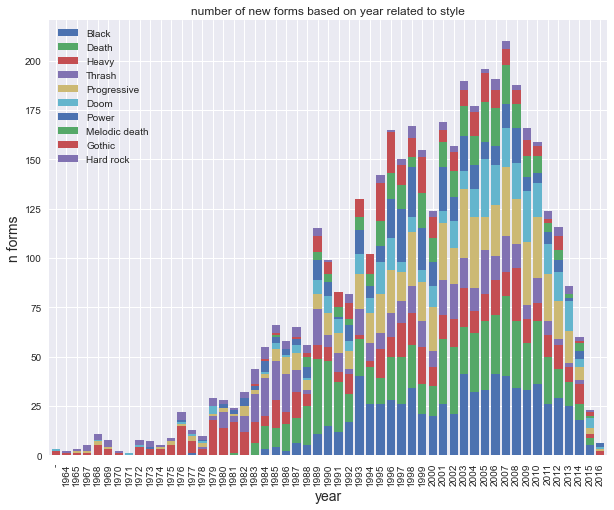

In [178]:
style_frame = pd.DataFrame()
uniques = bands_frame["formed"].unique()
style_frame["formed"] = uniques
style_frame = style_frame.set_index("formed")

style_dict = {}
for which_style in styles:
    style_frame[which_style]  = 0 
    for index, row in bands_frame.iterrows(): 
        if which_style in row["style"]:
            style_frame.at[row["formed"],which_style] += 1

style_frame.sort_index(inplace = True)
style_frame.plot( kind='bar', stacked=True,
        title='number of new forms based on year related to style',width= 0.8,figsize=(10,8),fontsize=10)
plt.style.use("seaborn")
plt.grid(color='w', linestyle='solid')
plt.xlabel("year",fontsize=14)
plt.ylabel("n forms",fontsize=14)

plt.show()
plt.close()

In [8]:
print(style_frame.head())

        Black  Grindcore  Heavy  Hard rock  Melodic death  Progressive
formed                                                                
-           0          0      2          0              0            0
1964        0          0      1          1              0            0
1965        0          0      1          1              0            1
1967        0          0      1          3              0            1
1968        0          0      5          3              0            2


## Plot for single style with lists &rarr; single style

In [9]:
which_style = "Heavy"

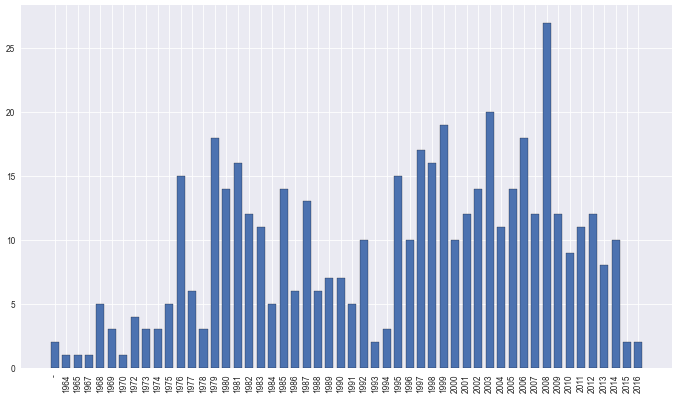

In [10]:
style_dict = {}
for index, row in bands_frame.iterrows():
    if which_style in row['style']:
        if row["formed"] in style_dict:
            style_dict[row["formed"]] += 1
        else:
            style_dict[row["formed"]] = 1

dictionary_items = style_dict.items()
sorted_items = sorted(dictionary_items)

years, amount_formed = [], []
for year,amount in sorted_items:    
    years.append(year)
    amount_formed.append(amount)

plt.figure(figsize=(14,8),dpi=60)
plt.style.use("seaborn")
plt.grid(color='w', linestyle='solid')
plt.bar(years,amount_formed,width = 0.7,edgecolor = "black")
plt.xticks(rotation=90)
plt.show()
plt.close()

## Easier approach

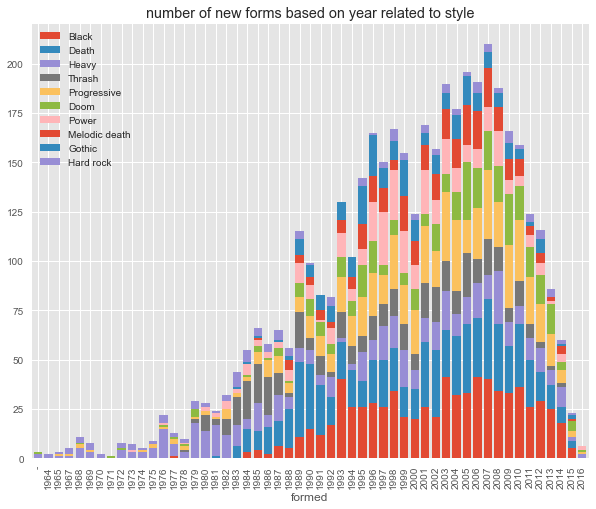

In [181]:
copy_frame = pd.DataFrame()
df = bands_frame.copy()
uniques = bands_frame["formed"].unique()
copy_frame["formed"] = uniques
copy_frame = copy_frame.set_index("formed")

for style in styles:
    series = df[df["style"].str.contains(style)].groupby("formed").size()
    copy_frame[style] = series
    
copy_frame.sort_index(inplace = True)
copy_frame.plot( kind='bar', stacked=True,
        title='number of new forms based on year related to style',width= 0.8,figsize=(10,8),fontsize=10)
plt.show()
plt.close()

## Last approach

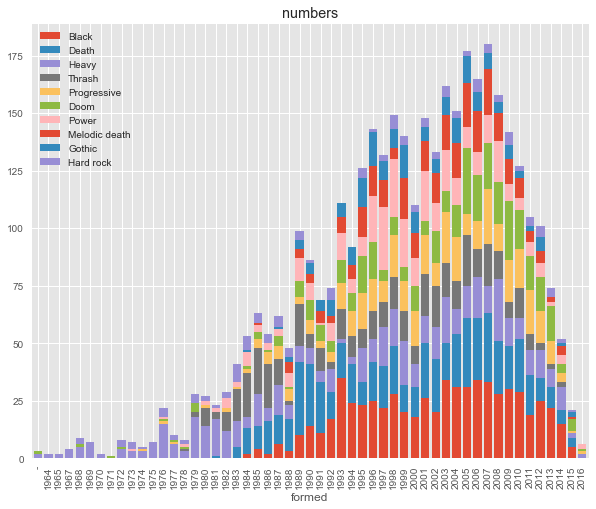

In [180]:
frame = bands_frame.copy()
eval_frame = pd.DataFrame()
uniques = bands_frame["formed"].unique()
eval_frame["formed"] = uniques
eval_frame = eval_frame.set_index("formed")

frame["style"] = frame["style"].map(lambda x: x.split(","))
for style in styles:  
    frame[style] = frame["style"].apply(lambda x: True if style in x else False )
    series = frame.groupby(style).formed.value_counts().get(True).sort_index()
    eval_frame[style] = series

    
plt.style.use("ggplot")
eval_frame.sort_index(inplace = True)
eval_frame.plot( kind='bar', stacked=True,
        title='numbers',width= 0.8,figsize=(10,8),fontsize=10)
plt.show()
plt.close()